### Predicting whether retail store customers are stisfied with AI

In [3]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import classification_report

In [4]:
#Load the dataset

df = pd.read_csv('/content/AI in Retail Dataset.csv', encoding='latin-1')
df.head()

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,...,AI_Tools_Used _Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing
0,INDIA,YES,Gen X,Medium High,Female,Masters Degree,NO,Metropolitan,NO,YES,...,YES,YES,YES,YES,NO,YES,YES,YES,YES,YES
1,INDIA,YES,Gen Z,Low,Male,University Graduate,YES,Metropolitan,NO,YES,...,YES,YES,YES,YES,YES,YES,YES,NO,NO,NO
2,INDIA,YES,Gen X,Medium High,Male,University Graduate,YES,Rural Areas,YES,YES,...,NO,YES,NO,YES,YES,YES,YES,YES,NO,NO
3,INDIA,YES,Gen X,High,Male,University Graduate,YES,Rural Areas,YES,YES,...,NO,NO,NO,YES,YES,YES,YES,YES,NO,YES
4,INDIA,YES,Gen Z,Low,Male,University Graduate,NO,Rural Areas,YES,YES,...,YES,NO,NO,YES,YES,YES,NO,YES,NO,YES


### Exploratory Data Analysis

In [5]:
df.shape

(656, 23)

In [6]:
df.describe()

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,...,AI_Tools_Used _Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing
count,656,656,656,656,656,656,656,656,656,656,...,656,656,656,656,656,656,656,656,656,656
unique,3,2,4,4,3,4,2,3,2,2,...,2,2,2,2,2,2,2,2,2,2
top,CHINA,YES,Millennials,High,Female,University Graduate,YES,Metropolitan,YES,YES,...,NO,NO,NO,NO,NO,YES,YES,NO,YES,YES
freq,252,635,366,230,361,347,425,438,485,554,...,359,359,406,462,407,329,432,374,342,480


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country                           656 non-null    object
 1   Online_Consumer                   656 non-null    object
 2   Age                               656 non-null    object
 3   Annual_Salary                     656 non-null    object
 4   Gender                            656 non-null    object
 5   Education                         656 non-null    object
 6   Payment_Method_Credit/Debit       656 non-null    object
 7   Living_Region                     656 non-null    object
 8   Online_Service_Preference         656 non-null    object
 9   AI_Endorsement                    656 non-null    object
 10  AI_Privacy_No_Trust               656 non-null    object
 11  AI_Enhance_Experience             656 non-null    object
 12  AI_Satisfication      

In [8]:
df.duplicated().sum()

8

In [9]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [10]:
df.isna().sum()

,0
Country,0
Online_Consumer,0
Age,0
Annual_Salary,0
Gender,0
Education,0
Payment_Method_Credit/Debit,0
Living_Region,0
Online_Service_Preference,0
AI_Endorsement,0


In [11]:
categorical = []
non_categorical = []

for col in df.columns:
  if df[col].dtype == 'object':
    categorical.append(col)
  else:
    non_categorical.append(col)

display('Categorical Columns:', categorical)
display('Non Categorical Columns:', non_categorical)

'Categorical Columns:'

['Country',
 'Online_Consumer',
 'Age',
 'Annual_Salary',
 'Gender',
 'Education',
 'Payment_Method_Credit/Debit',
 'Living_Region',
 'Online_Service_Preference',
 'AI_Endorsement',
 'AI_Privacy_No_Trust ',
 'AI_Enhance_Experience',
 'AI_Satisfication',
 'AI_Tools_Used _Chatbots',
 'AI_Tools_Used_Virtual_Assistant',
 'AI_Tools_Used_Voice&Photo_Search',
 'Payment_Method_COD',
 'Payment_Method_Ewallet',
 'Product_Category_Appliances',
 'Product_Category_Electronics',
 'Product_Category_Groceries',
 'Product_Category_Personal_Care',
 'Product_Category_Clothing']

'Non Categorical Columns:'

[]

### Visualizations

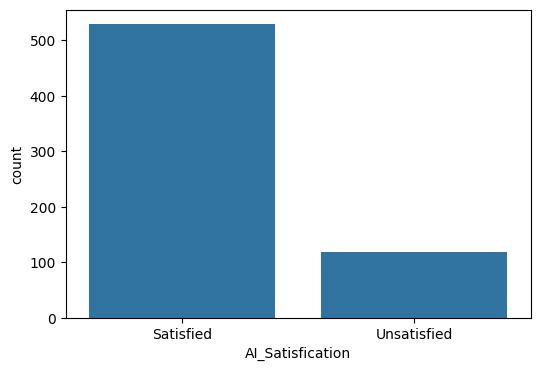

In [12]:
# Univariate

plt.figure(figsize = (6,4))
sns.countplot(x = df['AI_Satisfication'])
plt.show()


In [13]:
#Label encoding

le = LabelEncoder()

for col in df.columns:

  df[col] = le.fit_transform(df[col])

display(df)

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,...,AI_Tools_Used _Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing
0,2,1,1,3,0,2,0,0,0,1,...,1,1,1,1,0,1,1,1,1,1
1,2,1,2,1,1,3,1,0,0,1,...,1,1,1,1,1,1,1,0,0,0
2,2,1,1,3,1,3,1,1,1,1,...,0,1,0,1,1,1,1,1,0,0
3,2,1,1,0,1,3,1,1,1,1,...,0,0,0,1,1,1,1,1,0,1
4,2,1,2,1,1,3,0,1,1,1,...,1,0,0,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,0,1,3,0,1,2,1,2,1,1,...,1,1,1,1,1,1,1,1,1,1
651,0,1,1,2,0,1,0,2,1,0,...,0,0,0,1,0,1,1,1,1,1
653,0,1,3,0,0,3,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
654,0,1,3,0,0,1,1,2,0,1,...,1,0,0,0,0,0,1,0,1,1


In [14]:
#Feature Engineering

X = df.drop(columns = 'AI_Satisfication', axis = 1)
y = df['AI_Satisfication']

In [15]:
#Dealing with the imbalance dataset

smote = SMOTE(random_state = 42)

X_resampled, y_resampled = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [16]:
#Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size = 0.2, random_state = 42)

In [17]:
#model development

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_prediction = lr.predict(X_test)

report = classification_report(y_prediction, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       115
           1       0.80      0.86      0.83        97

    accuracy                           0.83       212
   macro avg       0.83      0.84      0.83       212
weighted avg       0.84      0.83      0.84       212



In [19]:
#SVM model

svc = SVC()

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       118
           1       0.85      0.94      0.89        94

    accuracy                           0.90       212
   macro avg       0.90      0.90      0.90       212
weighted avg       0.90      0.90      0.90       212



In [20]:
#Gradient boost model

gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       110
           1       0.87      0.88      0.87       102

    accuracy                           0.88       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.88      0.88      0.88       212



In [21]:
#Random Forest Model

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       117
           1       0.84      0.92      0.87        95

    accuracy                           0.88       212
   macro avg       0.88      0.89      0.88       212
weighted avg       0.89      0.88      0.88       212



In [22]:
#XG Boost model

xg = XGBClassifier()

xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)

report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       109
           1       0.89      0.90      0.90       103

    accuracy                           0.90       212
   macro avg       0.90      0.90      0.90       212
weighted avg       0.90      0.90      0.90       212



XG Boost and SVC models are seen to have the best accuracy scores at 0.9.

In [35]:
#Feature importance in the xg model

importances = xg.feature_importances_
features = X.columns

f_importances = pd.DataFrame({
    'Features': features,
    'Importance': importances
}).sort_values(by= 'Importance', ascending = True)

f_importances

,Features,Importance
12,AI_Tools_Used _Chatbots,0.009738
6,Payment_Method_Credit/Debit,0.012373
1,Online_Consumer,0.012592
20,Product_Category_Personal_Care,0.016137
2,Age,0.016285
13,AI_Tools_Used_Virtual_Assistant,0.017067
14,AI_Tools_Used_Voice&Photo_Search,0.017713
3,Annual_Salary,0.017791
5,Education,0.018379
10,AI_Privacy_No_Trust,0.018662


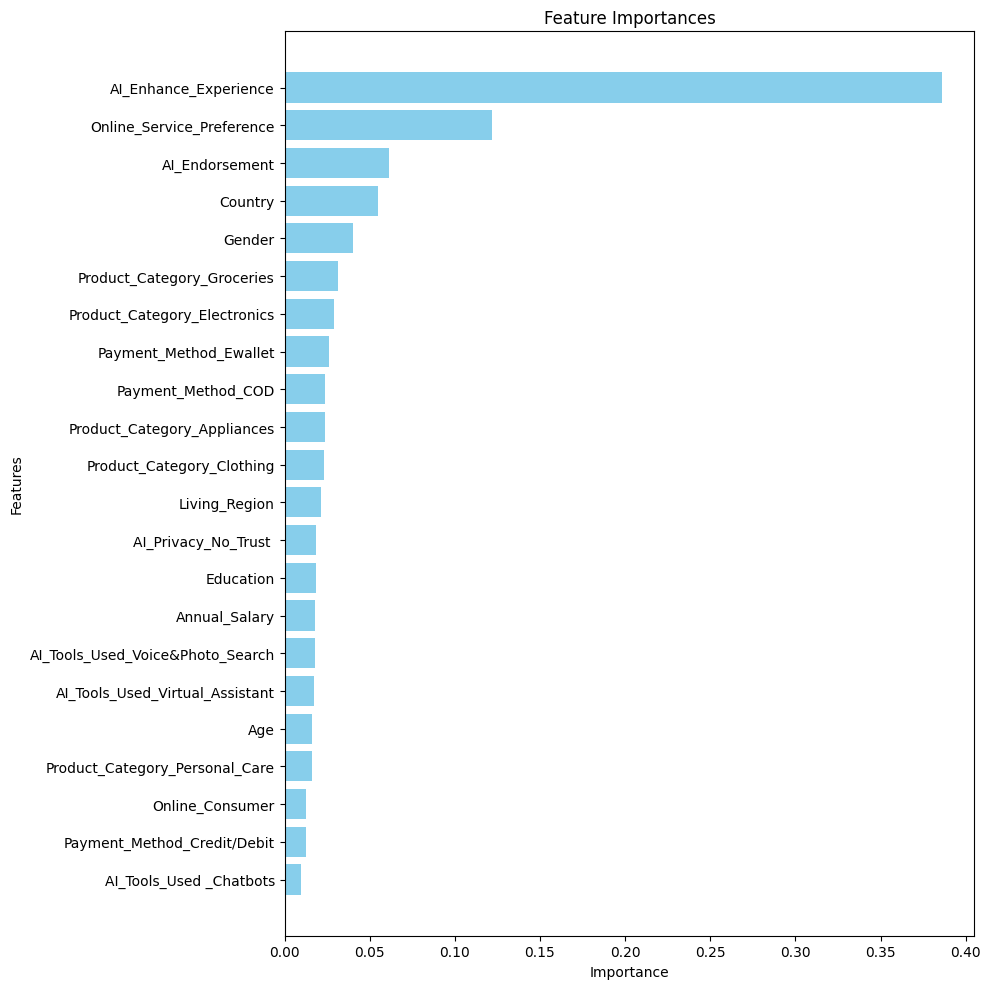

In [36]:
#Plotting the Feature importances

plt.figure(figsize=(10,10))
plt.barh(f_importances['Features'], f_importances['Importance'], color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

AI Enhance experience has the highest feature importances at close to 0.4

In [37]:
#Saving the model

import joblib

joblib.dump(xg, 'AI_satisfaction.pkl')
print('Model is successfully saved')

Model is successfully saved
